<a href="https://colab.research.google.com/github/ashmangla/ashmangla.gitbhub.io/blob/main/Traffic_analytics_use_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traffic Analayis

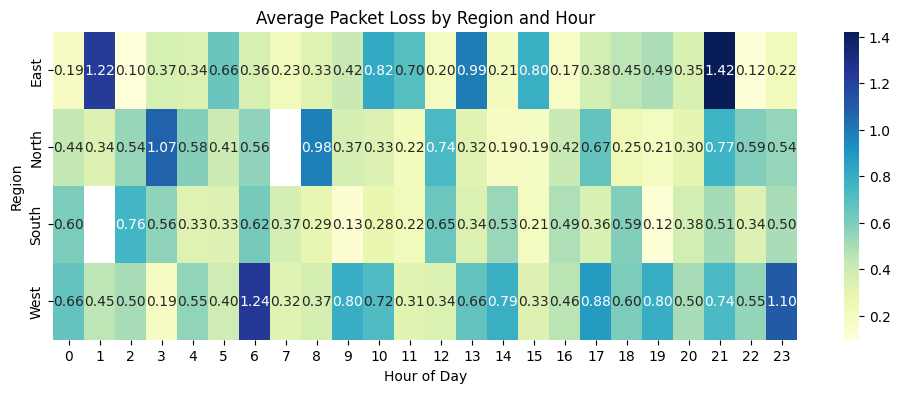

In [1]:
#Heatmap of average packet loss by region and hour
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate data
np.random.seed(0)
regions = ['North', 'South', 'East', 'West']
hours = list(range(24))

data = pd.DataFrame({
    'Region': np.random.choice(regions, 500),
    'Hour': np.random.choice(hours, 500),
    'PacketLoss': np.random.exponential(scale=0.5, size=500)
})

# Pivot table to prepare for heatmap
pivot = data.pivot_table(values='PacketLoss', index='Region', columns='Hour', aggfunc='mean')

# Plot
plt.figure(figsize=(12, 4))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Average Packet Loss by Region and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Region")
plt.show()


Predicting Network Throughput - using LSTM

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Simulated throughput time series
data = pd.DataFrame({
    'throughput': np.sin(np.arange(1000) / 50) + np.random.normal(0, 0.1, 1000)
})

# Normalize
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create LSTM sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        xs.append(data[i:i+seq_length])
        ys.append(data[i+seq_length])
    return np.array(xs), np.array(ys)

seq_len = 20
X, y = create_sequences(data_scaled, seq_len)

# Build model
model = Sequential([
    LSTM(50, input_shape=(seq_len, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=5, verbose=1)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2062
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0105
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0038
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0036
